# EDA

# Step 1:- Installing Necessary Libraries

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# Step 2:- Importing Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3:- Loading the Dataset

In [6]:
df = pd.read_csv("sales_data.csv")

# Step 4:- Displaying basic information and first few rows

In [7]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              100 non-null    object 
 1   Customer_ID       100 non-null    int64  
 2   Product_Category  100 non-null    object 
 3   Sales_Amount      100 non-null    float64
 4   Quantity_Sold     100 non-null    int64  
 5   Payment_Method    100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB
None
         Date  Customer_ID Product_Category  Sales_Amount  Quantity_Sold  \
0  2023-03-15         3542        Groceries        342.80              4   
1  2023-08-14         5928      Electronics        299.84              2   
2  2023-01-06         3695        Furniture         56.06              5   
3  2023-04-16         1175      Electronics        183.59              5   
4  2023-09-17         8732         Clothing        159.44              4  

# Step 5:- Handling Missing Values

In [8]:
df["Payment_Method"].fillna("Unknown", inplace=True)
df["Sales_Amount"].fillna(df["Sales_Amount"].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13696\3463780213.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Payment_Method"].fillna("Unknown", inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13696\3463780213.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

# Step 6:- Summary Statistics

In [9]:
print(df.describe())

       Customer_ID  Sales_Amount  Quantity_Sold
count   100.000000    100.000000     100.000000
mean   5455.770000    267.541100       2.940000
std    2554.043247    136.528233       1.339531
min    1050.000000     14.520000       1.000000
25%    3236.500000    171.620000       2.000000
50%    5531.000000    279.395000       3.000000
75%    7736.250000    388.015000       4.000000
max    9741.000000    495.270000       5.000000


# Step 7:- Sales by Product Category

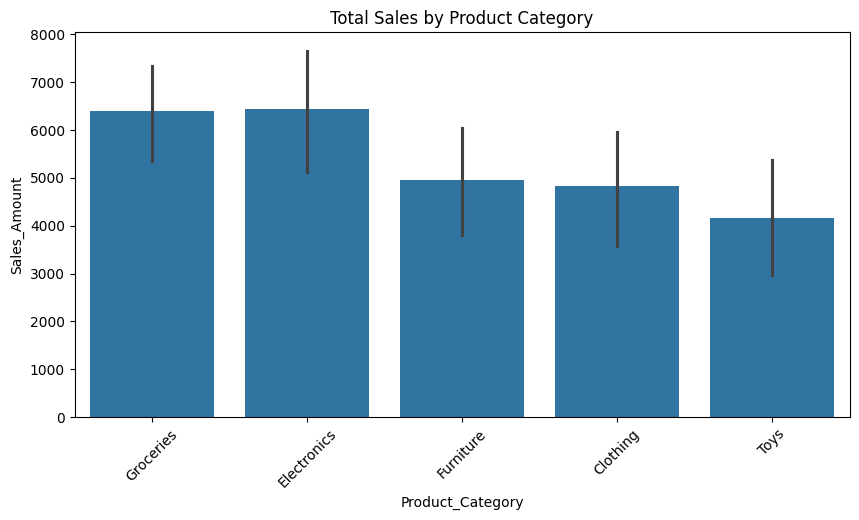

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x=df["Product_Category"], y=df["Sales_Amount"], estimator=np.sum)
plt.xticks(rotation=45)
plt.title("Total Sales by Product Category")
plt.show()

# Step 8:- Monthly Sales Trend

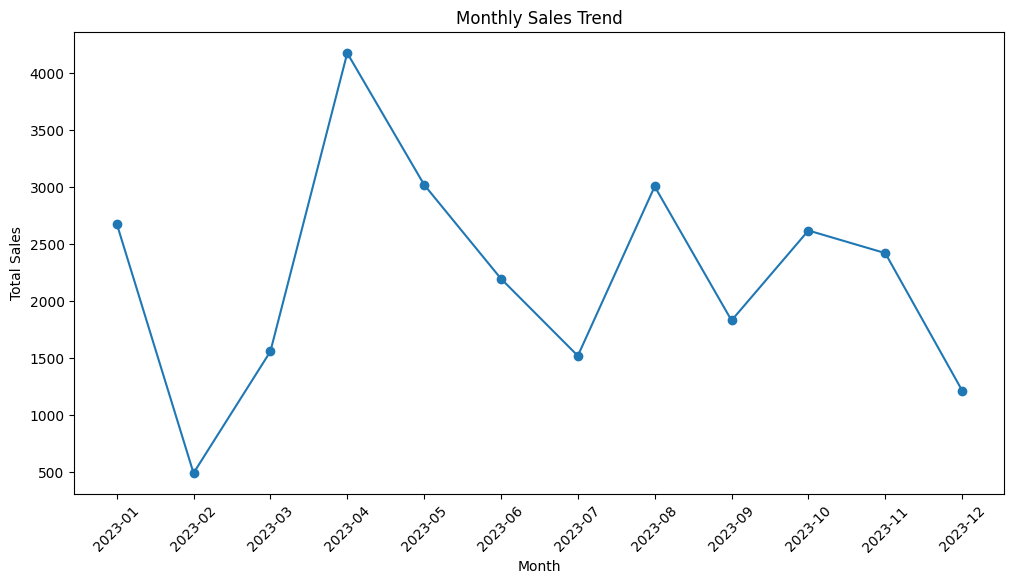

In [11]:
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.strftime('%Y-%m')
monthly_sales = df.groupby("Month")["Sales_Amount"].sum()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Step 9:- Outlier Detection using Boxplot

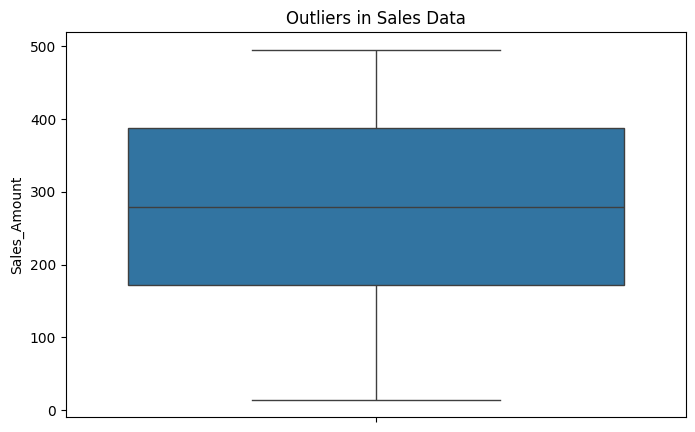

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(df["Sales_Amount"])
plt.title("Outliers in Sales Data")
plt.show()

# Step 10:- Payment Method Preference

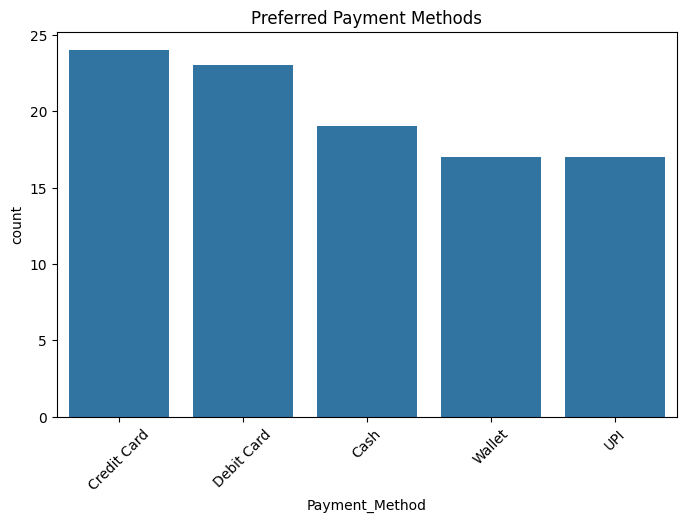

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["Payment_Method"], order=df["Payment_Method"].value_counts().index)
plt.title("Preferred Payment Methods")
plt.xticks(rotation=45)
plt.show()